In [1]:
import time
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 30)

# Get Supercoach Data

In [2]:
df_player_match_results = pd.read_csv('outputs/player_match_results.csv', index_col=0)
df_player_match_results['player_round_id'] = df_player_match_results['feed_id'].astype('str') + "_" + df_player_match_results['round_number_alt'].astype('str')
df_player_match_results

,round,coach_id,coach_team_id,coach_first_name,coach_team_name,player_id,played_position,points,on_field,feed_id,first_name,last_name,team,position,round_number_alt,player_round_id
0,1,86078,9806,Lester,HoweIMetYourMother,153,DEF,156,True,291313,Jeremy,Howe,COL,DEF,R1,291313_R1
1,2,86078,9806,Lester,HoweIMetYourMother,153,DEF,126,True,291313,Jeremy,Howe,COL,DEF,R2,291313_R2
2,3,86078,9806,Lester,HoweIMetYourMother,153,DEF,88,True,291313,Jeremy,Howe,COL,DEF,R3,291313_R3
3,4,86078,9806,Lester,HoweIMetYourMother,153,DEF,112,True,291313,Jeremy,Howe,COL,DEF,R4,291313_R4
4,1,86078,9806,Lester,HoweIMetYourMother,789,DEF,152,True,240283,Shannon,Hurn,WCE,DEF,R1,240283_R1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2107,11,71052,9867,James,Bad Boys For Fyfe,71,FWD,24,True,293581,Lincoln,McCarthy,BRL,FWD,R11,293581_R11
2108,12,8258,9856,Simon,It's always Sonny,614,DEF,79,False,280819,Dylan,Grimes,RIC,DEF,R12,280819_R12
2109,12,45168,5524,Luke,The Dragon's Laird,493,FWD,84,True,992644,Braydon,Preuss,MEL,RUC FWD,R12,992644_R12
2110,12,300791,182,Paul,Coronaviney,795,FWD,96,True,240406,Josh J.,Kennedy,WCE,FWD,R12,240406_R12


In [3]:
df_fixture_results = pd.read_csv('outputs/fixture_results.csv', index_col=0)
df_fixture_results

,round_number,match_name,home_team_id,home_team_name,home_team_coach,home_team_points,away_team_id,away_team_name,away_team_coach,away_team_points
0,1,Paul vs Mark,182,Coronaviney,Paul,1686,186,GetRichOrDieTryin,Mark,1657
0,1,Anthony vs Luke,189,The Full Bonty,Anthony,1662,5524,The Dragon's Laird,Luke,1720
0,1,Lester vs Simon,9806,HoweIMetYourMother,Lester,1827,9856,It's always Sonny,Simon,1476
0,1,James vs Jordan,9867,Bad Boys For Fyfe,James,1623,33301,"What's Up, Doch?",Jordan,1721
0,2,Paul vs Anthony,182,Coronaviney,Paul,1676,189,The Full Bonty,Anthony,1653
...,...,...,...,...,...,...,...,...,...,...
0,11,Luke vs Mark,5524,The Dragon's Laird,Luke,1466,186,GetRichOrDieTryin,Mark,1587
0,12,Paul vs Jordan,182,Coronaviney,Paul,1574,33301,"What's Up, Doch?",Jordan,1578
0,12,Simon vs James,9856,It's always Sonny,Simon,1748,9867,Bad Boys For Fyfe,James,1525
0,12,Luke vs Lester,5524,The Dragon's Laird,Luke,1752,9806,HoweIMetYourMother,Lester,1776


In [4]:
df_fixture_results_by_team = pd.read_csv('outputs/fixture_results_by_team.csv', index_col=0)
df_fixture_results_by_team

,round_number,match_name,team_id,team_name,team_coach,team_points,opposition_team_id,opposition_team_name,opposition_team_coach,opposition_team_points,Rank,Opponent Rank
0,1,Lester vs Simon,9806,HoweIMetYourMother,Lester,1827,9856,It's always Sonny,Simon,1476,1.0,8.0
0,1,James vs Jordan,33301,"What's Up, Doch?",Jordan,1721,9867,Bad Boys For Fyfe,James,1623,2.0,7.0
0,1,Anthony vs Luke,5524,The Dragon's Laird,Luke,1720,189,The Full Bonty,Anthony,1662,3.0,5.0
0,1,Paul vs Mark,182,Coronaviney,Paul,1686,186,GetRichOrDieTryin,Mark,1657,4.0,6.0
0,1,Anthony vs Luke,189,The Full Bonty,Anthony,1662,5524,The Dragon's Laird,Luke,1720,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
0,12,Simon vs James,9856,It's always Sonny,Simon,1748,9867,Bad Boys For Fyfe,James,1525,4.0,8.0
0,12,Mark vs Anthony,189,The Full Bonty,Anthony,1672,186,GetRichOrDieTryin,Mark,1867,5.0,1.0
0,12,Paul vs Jordan,33301,"What's Up, Doch?",Jordan,1578,182,Coronaviney,Paul,1574,6.0,7.0
0,12,Paul vs Jordan,182,Coronaviney,Paul,1574,33301,"What's Up, Doch?",Jordan,1578,7.0,6.0


# Get Fanfooty Data
- Limit to 2020

In [5]:
df_fanfooty_player = pd.read_csv('exports/scrape_20200817-230007/fanfooty_match_data_20200817-230007.csv', index_col=0)
df_fanfooty_player = df_fanfooty_player.loc[df_fanfooty_player['Year'] == 2020]
df_fanfooty_player['player_round_id'] = df_fanfooty_player['Player ID'].astype('int').astype('str') + "_" + df_fanfooty_player['Round'].astype('str')
df_fanfooty_player

C:\Users\richardm\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Fanfooty Match ID,Fanfooty Match URL,Round,Year,Player ID,First Name,Surname,Team,null,DT,SC,null2,null3,null4,Kicks,Handballs,Marks,Tackles,Hitouts,Frees for,Frees against,Goals,Behinds,Not sure,Tag,Tag Notes,Tag 2,Tag 2 Notes,null5,null6,null7,null8,Position,Jumper Number,null9,null10,null11,DT own %,SC own %,AF own %,null12,AF Breakeven,null13,Contested Possessions,Clearances,Clangers,Disposal efficiency,Time on ground,Metres gained,Injured,Opposition,player_round_id
88576,7301,http://live.fanfooty.com.au/game/matchcentre.h...,R1,2020,290847.0,Dustin,Martin,RI,20,90,126,113,72,100,12,12,3,4,0,1,1,1,1,Full Time,gun,%D and %M with %T... %s as well,shovel,Rotating midfield and forward,562600.0,NaN,543000.0,NaN,Midfielder,4.0,0.0,0.0,0.0,0.0,0.0,0.0,674000.0,NaN,NaN,8.0,3.0,3.0,75.0,93.0,257.0,False,CA,290847_R1
88577,7301,http://live.fanfooty.com.au/game/matchcentre.h...,R1,2020,290627.0,Dion,Prestia,RI,25,89,118,112,72,102,11,14,2,5,0,2,2,1,0,Full Time,star,%P and %M plus %T... %s as well,shovel,Playing inside midfield,528700.0,NaN,550200.0,NaN,Midfielder,3.0,0.0,0.0,0.0,0.0,0.0,0.0,618000.0,NaN,NaN,7.0,2.0,4.0,72.0,79.0,546.0,False,CA,290627_R1
88578,7301,http://live.fanfooty.com.au/game/matchcentre.h...,R1,2020,993993.0,Shai,Bolton,RI,21,83,102,104,68,82,11,2,6,2,0,1,0,3,1,Full Time,hot,%D with %k by foot... also %M and %T... and bo...,pocket,Starting in a FP,231600.0,NaN,379100.0,NaN,Midfielder,29.0,0.0,0.0,0.0,0.0,0.0,0.0,223000.0,NaN,NaN,3.0,1.0,2.0,69.0,85.0,416.0,False,CA,993993_R1
88579,7301,http://live.fanfooty.com.au/game/matchcentre.h...,R1,2020,998529.0,Ivan,Soldo,RI,16,71,100,83,61,71,4,6,2,3,25,3,0,0,1,Full Time,ruck,%H... also %D and %M with %T... %s as well... ...,NaN,NaN,264800.0,NaN,411200.0,NaN,Ruck,20.0,0.0,0.0,0.0,0.0,0.0,0.0,359000.0,NaN,NaN,9.0,5.0,0.0,90.0,58.0,133.0,False,CA,998529_R1
88580,7301,http://live.fanfooty.com.au/game/matchcentre.h...,R1,2020,1000981.0,Daniel,Rioli,RI,16,69,99,86,57,72,8,4,3,3,0,1,1,3,0,Full Time,wing,%s from %D and %M with %T... Starting forward,NaN,NaN,380700.0,NaN,321800.0,NaN,Forward,17.0,0.0,0.0,0.0,0.0,0.0,0.0,480000.0,NaN,NaN,5.0,0.0,1.0,91.0,81.0,246.0,False,CA,1000981_R1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93147,7405,http://live.fanfooty.com.au/game/matchcentre.h...,R12,2020,1006144.0,Ben,King,GC,7,25,47,17,22,28,3,3,1,0,0,0,0,1,1,Full Time,spearhead,%s from %P... In attack on Balta,NaN,NaN,NaN,NaN,NaN,NaN,Forward,34.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,5.0,0.0,0.0,50.0,95.0,112.0,False,RI,1006144_R12
93148,7405,http://live.fanfooty.com.au/game/matchcentre.h...,R12,2020,1008454.0,Connor,Budarick,GC,6,24,27,28,14,21,2,0,0,5,0,1,1,0,0,Full Time,guard,%P and %T... Playing small defender,NaN,NaN,NaN,NaN,NaN,NaN,Back Midfielder,35.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0,0.0,1.0,100.0,83.0,68.0,False,RI,1008454_R12
93149,7405,http://live.fanfooty.com.au/game/matchcentre.h...,R12,2020,1008882.0,Charlie,Ballard,GC,2,24,46,18,21,27,3,3,3,0,0,0,0,0,0,Full Time,guard,%P and %M... In defence,NaN,NaN,NaN,NaN,NaN,NaN,Midfielder,10.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,4.0,0.0,1.0,83.0,90.0,6.0,False,RI,1008882_R12
93150,7405,http://live.fanfooty.com.au/game/matchcentre.h...,R12,2020,291753.0,Sam,Day,GC,2,24,31,17,20,27,4,1,3,1,0,0,1,0,0,Full Time,spearhead,%D including %K... also %M... Starting forward...,NaN,NaN,NaN,NaN,NaN,NaN,Back,12.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,2.0,0.0,2.0,60.0,85.0,110.0,False,RI,291753_R12


# Get fanfooty data for each Supercoach Player that played

In [6]:
# df_player_match_results
df_sc_merged_player = pd.merge(df_player_match_results, df_fanfooty_player, how='left', on='player_round_id')
df_sc_merged_player

,round,coach_id,coach_team_id,coach_first_name,coach_team_name,player_id,played_position,points,on_field,feed_id,first_name,last_name,team,position,round_number_alt,player_round_id,Fanfooty Match ID,Fanfooty Match URL,Round,Year,Player ID,First Name,Surname,Team,null,DT,SC,null2,null3,null4,Kicks,Handballs,Marks,Tackles,Hitouts,Frees for,Frees against,Goals,Behinds,Not sure,Tag,Tag Notes,Tag 2,Tag 2 Notes,null5,null6,null7,null8,Position,Jumper Number,null9,null10,null11,DT own %,SC own %,AF own %,null12,AF Breakeven,null13,Contested Possessions,Clearances,Clangers,Disposal efficiency,Time on ground,Metres gained,Injured,Opposition
0,1,86078,9806,Lester,HoweIMetYourMother,153,DEF,156,True,291313,Jeremy,Howe,COL,DEF,R1,291313_R1,7302.0,http://live.fanfooty.com.au/game/matchcentre.h...,R1,2020.0,291313.0,Jeremy,Howe,CO,25.0,110.0,156.0,79.0,86.0,114.0,16.0,9.0,9.0,4.0,0.0,1.0,0.0,0.0,0.0,Full Time,hot,%D and %M with %T,job,In defence on Young,507700.0,NaN,431900.0,NaN,Back,38.0,0.0,0.0,0.0,0.0,0.0,0.0,597000.0,NaN,NaN,11.0,0.0,2.0,88.0,96.0,433.0,False,WB
1,2,86078,9806,Lester,HoweIMetYourMother,153,DEF,126,True,291313,Jeremy,Howe,COL,DEF,R2,291313_R2,7310.0,http://live.fanfooty.com.au/game/matchcentre.h...,R2,2020.0,291313.0,Jeremy,Howe,CO,14.0,79.0,126.0,106.0,63.0,87.0,16.0,4.0,7.0,2.0,0.0,0.0,2.0,0.0,0.0,Full Time,rock,%O including %K... also %M and %T,job,In defence,507700.0,NaN,NaN,NaN,Back,38.0,0.0,0.0,0.0,0.0,0.0,0.0,597000.0,NaN,NaN,4.0,0.0,5.0,80.0,100.0,364.0,False,RI
2,3,86078,9806,Lester,HoweIMetYourMother,153,DEF,88,True,291313,Jeremy,Howe,COL,DEF,R3,291313_R3,7322.0,http://live.fanfooty.com.au/game/matchcentre.h...,R3,2020.0,291313.0,Jeremy,Howe,CO,8.0,61.0,88.0,81.0,47.0,66.0,16.0,2.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,Full Time,job,%D with %k by foot... also %M... In defence on...,NaN,NaN,NaN,NaN,NaN,NaN,Back,38.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,2.0,0.0,2.0,88.0,92.0,437.0,False,SK
3,4,86078,9806,Lester,HoweIMetYourMother,153,DEF,112,True,291313,Jeremy,Howe,COL,DEF,R4,291313_R4,7329.0,http://live.fanfooty.com.au/game/matchcentre.h...,R4,2020.0,291313.0,Jeremy,Howe,CO,14.0,92.0,112.0,48.0,70.0,93.0,18.0,5.0,6.0,2.0,0.0,2.0,0.0,0.0,0.0,Full Time,longterminjured,Terrible injury in a clash with Hopper in Q4 t...,job,In defence on Finlayson,NaN,NaN,NaN,NaN,Back,38.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,8.0,2.0,4.0,73.0,80.0,499.0,False,WS
4,1,86078,9806,Lester,HoweIMetYourMother,789,DEF,152,True,240283,Shannon,Hurn,WCE,DEF,R1,240283_R1,7309.0,http://live.fanfooty.com.au/game/matchcentre.h...,R1,2020.0,240283.0,Shannon,Hurn,WC,14.0,94.0,152.0,122.0,75.0,99.0,17.0,6.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,Full Time,gun,%O including %K... also %M,guard,Floating at half back,549100.0,NaN,562200.0,NaN,Back,25.0,0.0,0.0,0.0,0.0,0.0,0.0,645000.0,NaN,NaN,5.0,0.0,0.0,95.0,83.0,339.0,False,ME
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2107,11,71052,9867,James,Bad Boys For Fyfe,71,FWD,24,True,293581,Lincoln,McCarthy,BRL,FWD,R11,293581_R11,7390.0,http://live.fanfooty.com.au/game/matchcentre.h...,R11,2020.0,293581.0,Lincoln,McCarthy,BL,2.0,22.0,24.0,28.0,17.0,24.0,1.0,4.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,Full Time,wing,%O with %b by hand... also %T... Starting on a...,NaN,NaN,NaN,NaN,NaN,NaN,Forward,11.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,3.0,1.0,3.0,80.0,78.0,102.0,False,WB
2108,12,8258,9856,Simon,It's always Sonny,614,DEF,79,False,280819,Dylan,Grimes,RIC,DEF,R12,280819_R12,7405.0,http://live.fanfooty.com.au/game/matchcentre.h...,R12,2020.0,280819.0,Dylan,Grimes,RI,4.0,48.0,79.0,63.0,37.0,48.0,9.0,2.0,4.0,1.0,0.0,1.0,0.0,0.0,0.0,Full Time,job,%D including %K... also %M... Minding Day,NaN,NaN,NaN,NaN,NaN,NaN,Back,2.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,3.0,0.0,0.0,81.0,100.0,233.0,False,GC
2109,12,45168,5524,Luke,The Drago

# Fixture Difficulty

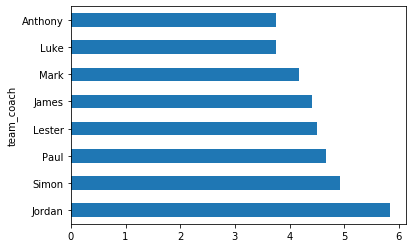

In [7]:
# df_combined_fixture_results_by_team['Rank'] = df_combined_fixture_results_by_team.groupby('round_number')['team_points'].rank(ascending=False)
# df_combined_fixture_results_by_team['Oppenent Rank'] = df_combined_fixture_results_by_team.groupby('round_number')['opposition_team_points'].rank(ascending=False)
# df_combined_fixture_results_by_team = df_combined_fixture_results_by_team.sort_values(['round_number', 'Rank'])
df_fixture_difficulty = df_fixture_results_by_team.groupby('team_coach')['Opponent Rank'].agg('mean').sort_values(ascending=False)
plot_fixture_difficulty = df_fixture_difficulty.plot(kind='barh', x='Opponent Rank', y='team_coach')

plot_fixture_difficulty

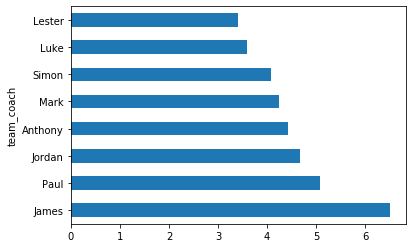

In [8]:
df_fixture_strength = df_fixture_results_by_team.groupby('team_coach')['Rank'].agg('mean').sort_values(ascending=False)
plot_fixture_strength = df_fixture_strength.plot(kind='barh', x='Rank', y='team_coach')

plot_fixture_strength

# Ladder Tracker

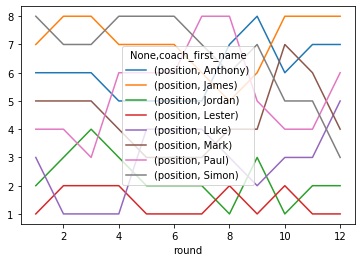

In [9]:
# Ladder position change throughout season
df_combined_weekly_ladders = pd.read_csv("outputs/ladder.csv", index_col=0)
df_grouped_ladder = pd.pivot_table(df_combined_weekly_ladders, index=['round'], columns=['coach_first_name'], values=['position'])
plot = df_grouped_ladder.plot(kind='line')
plot

# Free Agent, Waiver, and Trade Picks

In [10]:
df_transactions = pd.read_csv('outputs/transactions.csv', index_col=0)

In [11]:
df_transactions

,round,user_team_id,processed,player_id,player.feed_id,player.first_name,player.last_name,player.team.abbrev,dropped_player_id,dropped_player.feed_id,dropped_player.first_name,dropped_player.last_name,dropped_player.team.abbrev,source
0,2,182,2020-03-24 04:00:02,227,296294.0,Blake,Acres,FRE,486.0,291533.0,Tom,McDonald,MEL,waiver
1,2,9856,2020-03-24 04:00:02,734,293651.0,Hayden,Crozier,WBD,577.0,293987.0,Jarrod,Lienert,PTA,waiver
2,2,182,2020-03-24 04:00:02,593,294318.0,Ollie,Wines,PTA,802.0,281373.0,Jack,Redden,WCE,waiver
3,2,9856,2020-03-24 04:00:02,797,271045.0,Nic,Naitanui,WCE,356.0,298419.0,Brandan,Parfitt,GEE,waiver
4,2,182,2020-03-24 04:00:02,159,992010.0,Brayden,Maynard,COL,278.0,998129.0,Will,Brodie,GCS,waiver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33,12,182,2020-08-15 19:14:14,795,240406.0,Josh J.,Kennedy,WCE,784.0,298268.0,Liam,Duggan,WCE,free_agent
34,12,182,2020-08-15 19:24:37,665,993917.0,Ben,Long,STK,238.0,997033.0,Brennan,Cox,FRE,free_agent
123,12,9856,2020-08-15 19:38:09,614,280819.0,Dylan,Grimes,RIC,682.0,296422.0,Callum,Wilkie,STK,free_agent
136,12,9867,2020-08-15 19:47:32,38,997230.0,Tyson,Stengle,ADE,319.0,290832.0,David,Swallow,GCS,free_agent


In [12]:
def get_transaction_status(row):
    post_transaction_list = pd.DataFrame()
    round_number = row['round']
    feed_id = row['player.feed_id']
    source = row['source']
    player_rows = df_player_match_results.loc[(df_player_match_results['round'] >= round_number) & (df_player_match_results['feed_id'] == feed_id), :]
    player_rows['source'] = source
    if len(player_rows) > 0:
        df_player_match_results.update(player_rows)

df_player_match_results['source'] = "Draft"
df_transactions.apply(lambda row: get_transaction_status(row), axis=1)
df_player_match_results

C:\Users\richardm\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,round,coach_id,coach_team_id,coach_first_name,coach_team_name,player_id,played_position,points,on_field,feed_id,first_name,last_name,team,position,round_number_alt,player_round_id,source
0,1.0,86078.0,9806.0,Lester,HoweIMetYourMother,153.0,DEF,156.0,True,291313.0,Jeremy,Howe,COL,DEF,R1,291313_R1,Draft
1,2.0,86078.0,9806.0,Lester,HoweIMetYourMother,153.0,DEF,126.0,True,291313.0,Jeremy,Howe,COL,DEF,R2,291313_R2,Draft
2,3.0,86078.0,9806.0,Lester,HoweIMetYourMother,153.0,DEF,88.0,True,291313.0,Jeremy,Howe,COL,DEF,R3,291313_R3,Draft
3,4.0,86078.0,9806.0,Lester,HoweIMetYourMother,153.0,DEF,112.0,True,291313.0,Jeremy,Howe,COL,DEF,R4,291313_R4,Draft
4,1.0,86078.0,9806.0,Lester,HoweIMetYourMother,789.0,DEF,152.0,True,240283.0,Shannon,Hurn,WCE,DEF,R1,240283_R1,Draft
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2107,11.0,71052.0,9867.0,James,Bad Boys For Fyfe,71.0,FWD,24.0,True,293581.0,Lincoln,McCarthy,BRL,FWD,R11,293581_R11,free_agent
2108,12.0,8258.0,9856.0,Simon,It's always Sonny,614.0,DEF,79.0,False,280819.0,Dylan,Grimes,RIC,DEF,R12,280819_R12,free_agent
2109,12.0,45168.0,5524.0,Luke,The Dragon's Laird,493.0,FWD,84.0,True,992644.0,Braydon,Preuss,MEL,RUC FWD,R12,992644_R12,free_agent
2110,12.0,300791.0,182.0,Paul,Coronaviney,795.0,FWD,96.0,True,240406.0,Josh J.,Kennedy,WCE,FWD,R12,240406_R12,free_agent


In [1]:
df_player_match_results.to_csv('outputs/player_source_by_game.csv')

NameError: name 'df_player_match_results' is not defined